# DS 2500 – Module Assignment 1
**WWII Bombing Operations by Allied Forces**

Aaron Templeton
U0734119

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import pandas as pd

# 1. Formulate your questions

Which City/Town was impacted the most by the bombing operations of the allied forces during WWII?

# 2. Read in your data

From Kaggle [Aerial Bombing Operations in WWII](https://www.kaggle.com/usaf/world-war-ii).

This dataset consists of digitized paper mission reports from WWII. Each record includes the date, conflict, geographic location, and other data elements to form a live-action sequence of air warfare from 1939 to 1945. The records include U.S. and Royal Air Force data, in addition to some Australian, New Zealand and South African air force missions.

Lt Col Jenns Robertson of the US Air Force developed the Theater History of Operations Reports (THOR) and posted them online after receiving Department of Defense approval.

In [0]:
!curl -L "https://www.dropbox.com/s/jq8iblqtg7724ha/operations.csv?dl=0" > 'operations.csv'
df = pd.read_csv('operations.csv', dtype=str, parse_dates=['Mission Date'], low_memory=False)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 26.9M  100 26.9M    0     0  12.1M      0  0:00:02  0:00:02 --:--:-- 18.7M


# 3. Check the packaging

In [0]:
df.shape

(178281, 46)

# 4. Look at the top and bottom of data

In [0]:
df['Mission Date'] = df['Mission Date'].apply(lambda x: x - pd.DateOffset(years=100))
df.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,Takeoff Location,Takeoff Latitude,Takeoff Longitude,Target ID,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Airborne Aircraft,Attacking Aircraft,Bombing Aircraft,Aircraft Returned,Aircraft Failed,Aircraft Damaged,Aircraft Lost,High Explosives,High Explosives Type,High Explosives Weight (Pounds),High Explosives Weight (Tons),Incendiary Devices,Incendiary Devices Type,Incendiary Devices Weight (Pounds),Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,1943-08-15,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,40675,ITALY,SPADAFORA,NaN,NaN,NaN,38.22,15.37,NaN,20,NaN,20,NaN,NaN,NaN,NaN,40,500 LB GP (GP-M43/M64),NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN
1,2,1943-08-15,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,NaN,NaN,NaN,NaN,NEW GUINEA,KOMIATUM,RIDGE,NaN,1,-7.166666667,147,44,NaN,6,NaN,NaN,NaN,NaN,NaN,40,1000 LB GP (GP-M44/M65),NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,9366
2,3,1943-08-15,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,9630,ITALY,COSENZA,NaN,NaN,NaN,39.27,16.25,NaN,18,NaN,36,NaN,NaN,NaN,NaN,36,500 LB GP (GP-M43/M64),NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN
3,4,1943-08-15,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,16140,ITALY,GIOJA TAURO,NaN,NaN,NaN,38.43,15.9,NaN,15,NaN,15,NaN,1,NaN,NaN,30,500 LB GP (GP-M43/M64),NaN,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,1943-08-15,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,NaN,NaN,NaN,NaN,SUMATRA,KILA,VILLAGE,NaN,1,-1.116666667,103.8833333,60,NaN,6,NaN,NaN,NaN,NaN,NaN,16,1000 LB GP (GP-M44/M65),NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,22585


In [0]:
df.tail()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,Takeoff Location,Takeoff Latitude,Takeoff Longitude,Target ID,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Airborne Aircraft,Attacking Aircraft,Bombing Aircraft,Aircraft Returned,Aircraft Failed,Aircraft Damaged,Aircraft Lost,High Explosives,High Explosives Type,High Explosives Weight (Pounds),High Explosives Weight (Tons),Incendiary Devices,Incendiary Devices Type,Incendiary Devices Weight (Pounds),Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
178276,178738,1945-02-16,CBI,USA,10 AF,89 FS,P47,NaN,10,NaN,NaN,NaN,NaN,NaN,BURMA,NAMTOI,SUPPLY AREA,NaN,1,22.83333333,96.91666667,15,NaN,6,NaN,NaN,NaN,NaN,NaN,8,250 LB GP (GP-M57),NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,35815
178277,178739,1945-02-16,CBI,USA,10 AF,90 FS,P47,NaN,10,NaN,NaN,NaN,NaN,NaN,BURMA,MYITSON,UNIDENTIFIED TARGET,NaN,1,21.433333,96.466667,5,NaN,4,NaN,NaN,NaN,NaN,NaN,8,250 LB GP (GP-M57),NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,35020
178278,178740,1945-02-16,CBI,USA,10 AF,90 FS,P47,NaN,10,NaN,NaN,NaN,NaN,NaN,BURMA,MYITSON,UNIDENTIFIED TARGET,NaN,1,21.433333,96.466667,5,NaN,4,NaN,NaN,NaN,NaN,NaN,8,250 LB GP (GP-M57),NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,35022
178279,178741,1945-02-16,PTO,NEW ZEALAND,RNZAF,NO. 22 SQUADRON RNZAF,F4U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEW IRELAND,KAVIENG SWEEP,VARIOUS TARGETS,NaN,NaN,-2.583333333,150.8333333,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,8,1000 LB GP (GP-M44/M65),8000,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000,4,NaN,NaN,NaN
178280,178742,1945-02-16,CBI,USA,10 AF,59 FS,P47,NaN,10,NaN,NaN,NaN,NaN,NaN,BURMA,MONGLI,STORES,NaN,1,24.88333333,97.58333333,25,NaN,8,NaN,NaN,NaN,NaN,NaN,6,325 LB DC (DB-MK 17/47),NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,33784


# 5. Check the "n"s

There should be 178,281 operations

In [0]:
df['Mission ID'].count()

178281

Dates should be during WWII (September 1, 1939 – September 2, 1945)

In [0]:
mdate = df['Mission Date']
start = '1939-09-01'
end = '1945-09-02'
mask = (mdate >= start) & (mdate <= end)
if mask.count() == df['Mission ID'].count():
  print("All are during WWII")
else:
  print("Some dates are not during WWII")

All are during WWII


Operations performed by Allied Forces only.




In [0]:
countries = {}
for c in df['Country']:
  if c in countries.keys():
    countries[c] +=1
  else:
    countries[c] = 1

sum = 0  
for k,v in countries.items():
  if str(k) == 'nan':
    print('OTHER', v)
  else:
    print(k, v)
  sum += v
print('TOTAL', sum)

USA 94165
GREAT BRITAIN 31361
OTHER 51787
NEW ZEALAND 633
SOUTH AFRICA 19
AUSTRALIA 316
TOTAL 178281


Weight in Tons of Bombs

In [0]:
mask = df['Total Weight (Tons)'].astype(float)
total = mask.sum()
print('{:,.2f}'.format(total))

4,289,300.33


# 6. Validate against an external data source

according to the [United States Strategic Bombing Survey](https://www.anesi.com/ussbs02.htm) about 2.7 million tons of bombs dropped by US and British Air Forces

In [0]:
allowed = ['USA', 'GREAT BRITAIN']
tons = df.loc[df['Country'].isin(allowed)]
total = tons['Total Weight (Tons)'].apply(lambda x: float(x)).sum()
print('{:,.2f}'.format(total))

2,754,884.54


31 tons of bombs dropped in 1939


In [0]:
start = pd.to_datetime('01/01/1939')
end = pd.to_datetime('12/31/1939')
w = df
f = w[w['Mission Date'].between(start, end)]
f['Total Weight (Tons)'].sum()

0

about 500k tons of bombs dropped over France

In [0]:
allowed = ['FRANCE']
tons = df.loc[df['Target Country'].isin(allowed)]
total = tons['Total Weight (Tons)'].apply(lambda x: float(x)).sum()
print('{:,.2f}'.format(total))

822,855.00


about 1.5 Million Tons of bombs dropped on Germany

In [0]:
allowed = ['GERMANY']
tons = df.loc[df['Target Country'].isin(allowed)]
total = tons['Total Weight (Tons)'].apply(lambda x: float(x)).sum()
print('{:,.2f}'.format(total))

1,993,426.00


about 200k tons dropped on Italy

In [0]:
allowed = ['ITALY']
tons = df.loc[df['Target Country'].isin(allowed)]
total = tons['Total Weight (Tons)'].apply(lambda x: float(x)).sum()
print('{:,.2f}'.format(total))

417,004.62


# 7. Make a plot

<BarContainer object of 6 artists>

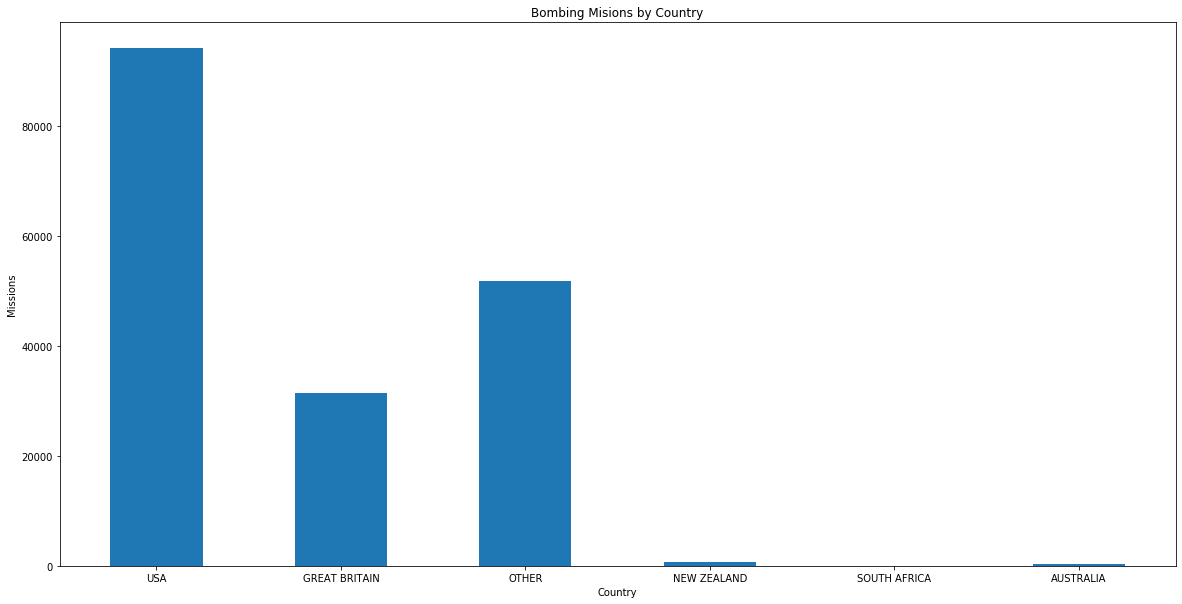

In [0]:
countries = {}
for c in df['Country']:
  if str(c) == 'nan':
    c = 'OTHER'
  if c in countries.keys():
    countries[c] +=1
  else:
    countries[c] = 1
countries

plt.figure(figsize=(20,10))
plt.xlabel('Country')
plt.ylabel('Missions')
plt.title('Bombing Misions by Country')
plt.bar(countries.keys(), countries.values(), width=.5)

<BarContainer object of 4 artists>

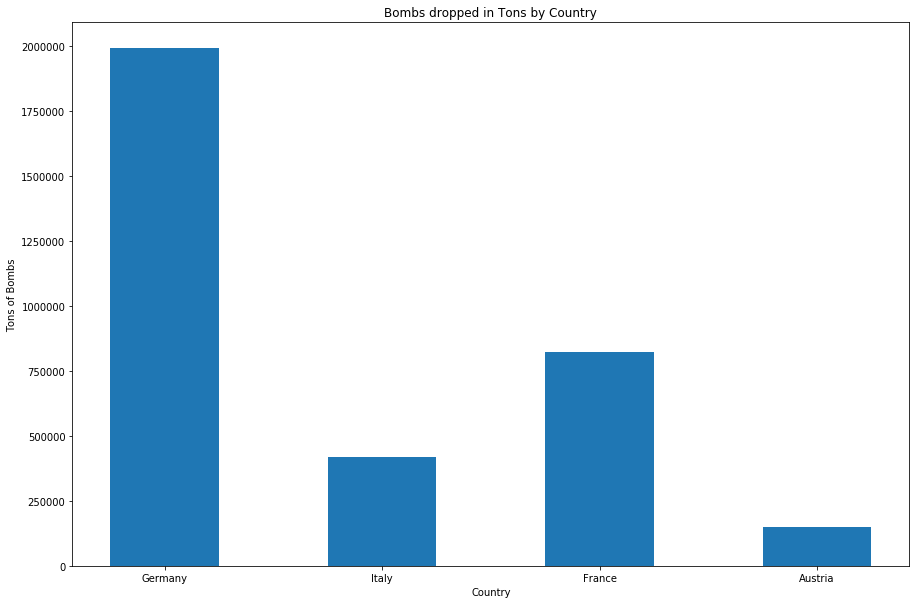

In [0]:
bombs={}
tonsG = df.loc[df['Target Country'].isin(['GERMANY'])]
totalG = tonsG['Total Weight (Tons)'].apply(lambda x: float(x)).sum()
bombs['Germany'] = totalG

tonsi = df.loc[df['Target Country'].isin(['ITALY'])]
totali = tonsi['Total Weight (Tons)'].apply(lambda x: float(x)).sum()
bombs['Italy'] = totali

tonsf = df.loc[df['Target Country'].isin(['FRANCE'])]
totalf = tonsf['Total Weight (Tons)'].apply(lambda x: float(x)).sum()
bombs['France'] = totalf

tonsa = df.loc[df['Target Country'].isin(['AUSTRIA'])]
totala = tonsa['Total Weight (Tons)'].apply(lambda x: float(x)).sum()
bombs['Austria'] = totala

bombs

plt.figure(figsize=(15,10))
plt.xlabel('Country')
plt.ylabel('Tons of Bombs')
plt.title('Bombs dropped in Tons by Country')
plt.bar(bombs.keys(), bombs.values(), width=.5)


In [0]:
years={}

start = pd.to_datetime('01/01/1939')
end = pd.to_datetime('12/31/1939')
w = df
f = w[w['Mission Date'].between(start, end)]
t39 = f['Total Weight (Tons)'].sum()
years['1939'] = t39

start = pd.to_datetime('01/01/1940')
end = pd.to_datetime('12/31/1940')
w = df
f = w[w['Mission Date'].between(start, end)]
t40 = f['Total Weight (Tons)'].astype(float).sum()
years['1940'] = t40

start = pd.to_datetime('01/01/1941')
end = pd.to_datetime('12/31/1941')
w = df
f = w[w['Mission Date'].between(start, end)]
t41 = f['Total Weight (Tons)'].astype(float).sum()
years['1941'] = t41

start = pd.to_datetime('01/01/1942')
end = pd.to_datetime('12/31/1942')
w = df
f = w[w['Mission Date'].between(start, end)]
t42 = f['Total Weight (Tons)'].astype(float).sum()
years['1942'] = t42

start = pd.to_datetime('01/01/1943')
end = pd.to_datetime('12/31/1943')
w = df
f = w[w['Mission Date'].between(start, end)]
t43 = f['Total Weight (Tons)'].astype(float).sum()
years['1943'] = t43

start = pd.to_datetime('01/01/1944')
end = pd.to_datetime('12/31/1944')
w = df
f = w[w['Mission Date'].between(start, end)]
t44 = f['Total Weight (Tons)'].astype(float).sum()
years['1944'] = t44

start = pd.to_datetime('01/01/1945')
end = pd.to_datetime('12/31/1945')
w = df
f = w[w['Mission Date'].between(start, end)]
t45 = f['Total Weight (Tons)'].astype(float).sum()
years['1945'] = t45

years
plt.figure(figsize=(15,10))
plt.xlabel('Years')
plt.ylabel('Tons of Bombs')
plt.title('Bombs dropped in Tons by Year')
plt.plot(list(years.keys()), list(years.values()))


# 8. Try an easy solution

Which City/Town was affected most by allied forces bombing operations?

In [0]:
df['Target City'].value_counts().head(10)

From the above data, Berlin, Hamburg, Cologne were among the cities that had the most bombing missions (some unidentified or unknown)

In [0]:
df['Target City'].value_counts().tail(10)

Many cities/towns were only impacted by a single bombing mission

In [0]:
from heapq import nlargest, nsmallest
cities = {}
for (idx, row) in df.iterrows():
  city = row.loc['Target City']
  tons = row.loc['Total Weight (Tons)']
  if city in cities.keys():
    cities[city] += float(tons)
  else:
    cities[city] = float(tons)

largest = nlargest(5, cities, key=cities.get)
smallest = nsmallest(5, cities, key=cities.get)
for c in largest:
  print(c, cities[c])
for c in smallest:
  print(c, cities[c])

PLOESTI 22618.0
NAGASAKI 20395.0
HIROSHIMA 15007.0
WIENER NEUSTADT 13834.0
METZ 12161.0
BAIANO 0.0
SAN SALVATORE 0.0
41 00 N 015 00 E 0.0
PIETRAVAIRANO 0.0
S CESARIO 0.0


The cities with the most tons dropped are:


1.   Ploesti, Romania
2.   Nagasaki, Japan
3.   Hiroshima, Japan

the lest impacted are:



1.   Baiano
2.   San Salvatore
3.   Pietravairano





#Conclusion and Analysis

The question asked about the dataset is:

which city/town was impacted most by the allied forces bombing operations during WWII?

It may seem like an obvious question to ask due to atomic bombs dropped on Nagasaki and Hiroshima, However, upon further data analysis of this dataset it has been discovered that other cities were heavily attacked.

Berlin Germany received the highest amount of bombing operations and Ploesti, Romania had the most tons of bombs dropped on it. Even more than Nagasaki and Hiroshima, which is very surprising. 

during my research and analysis of the data, i did not suspect there to be so many bombing operations (nearly 180k) and so many tons of bombs dropped (over 4 million). It was extremely surprising to learn just how high the numbers were. You get another perspective on the war just by looking at these numbers and how they impacted the european cities and towns.

I chose to show visualizations for how many bombing operations were performed by each of the allied forces. I was surprised that the USA still had the most bombing operations even though the country was not involved for the first 3 years of the war and later joined in the end 1941.

the second visualization shows a few arbitrary European countries and the number of tons of bombs that were dropped on them. The final visualization shows the total weight in tons of bombs dropped per year during WWII. 

I chose to test my question in 2 ways:
1. which city had the most bombings?
2. which city had the most tons of bombs dropped on it?

the city with the most bombings was Berlin, Germany. Which makes sense with history since it was the capital of Nazi Germany. 

the city with the most tons of bombs dropped was Ploesti, Romania. Upon further research, I discovered the this is due to Operation Tidal Wave. Which was a bombing operation performed by allied forces to deplete the Axis oil refineries, nine oil refineries in total, around Ploiești, Romania.

in conclusion, analyzing the data of the bombing operations can give a new perpsective on the impact of the bombings during WWII and highlight the key areas that lead the Allied Forces to victory. 
